# Requirements

In [ ]:
# Dataset Download & Analysis
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import seaborn as sns
# Dataset Treatement
from sklearn.model_selection import train_test_split
# Training
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
import random
# Seeds
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

## Dataset Download 

In [14]:
# Cargar el dataset
housing = fetch_california_housing()
data = pd.DataFrame(housing.data, columns=housing.feature_names)
data['MedHouseVal'] = housing.target # Etiquetas que supervisarán el entrenamiento
print("Tamaño del dataset: ", len(data))
data.head()

Tamaño del dataset:  20640


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# Dataset Analaysis 

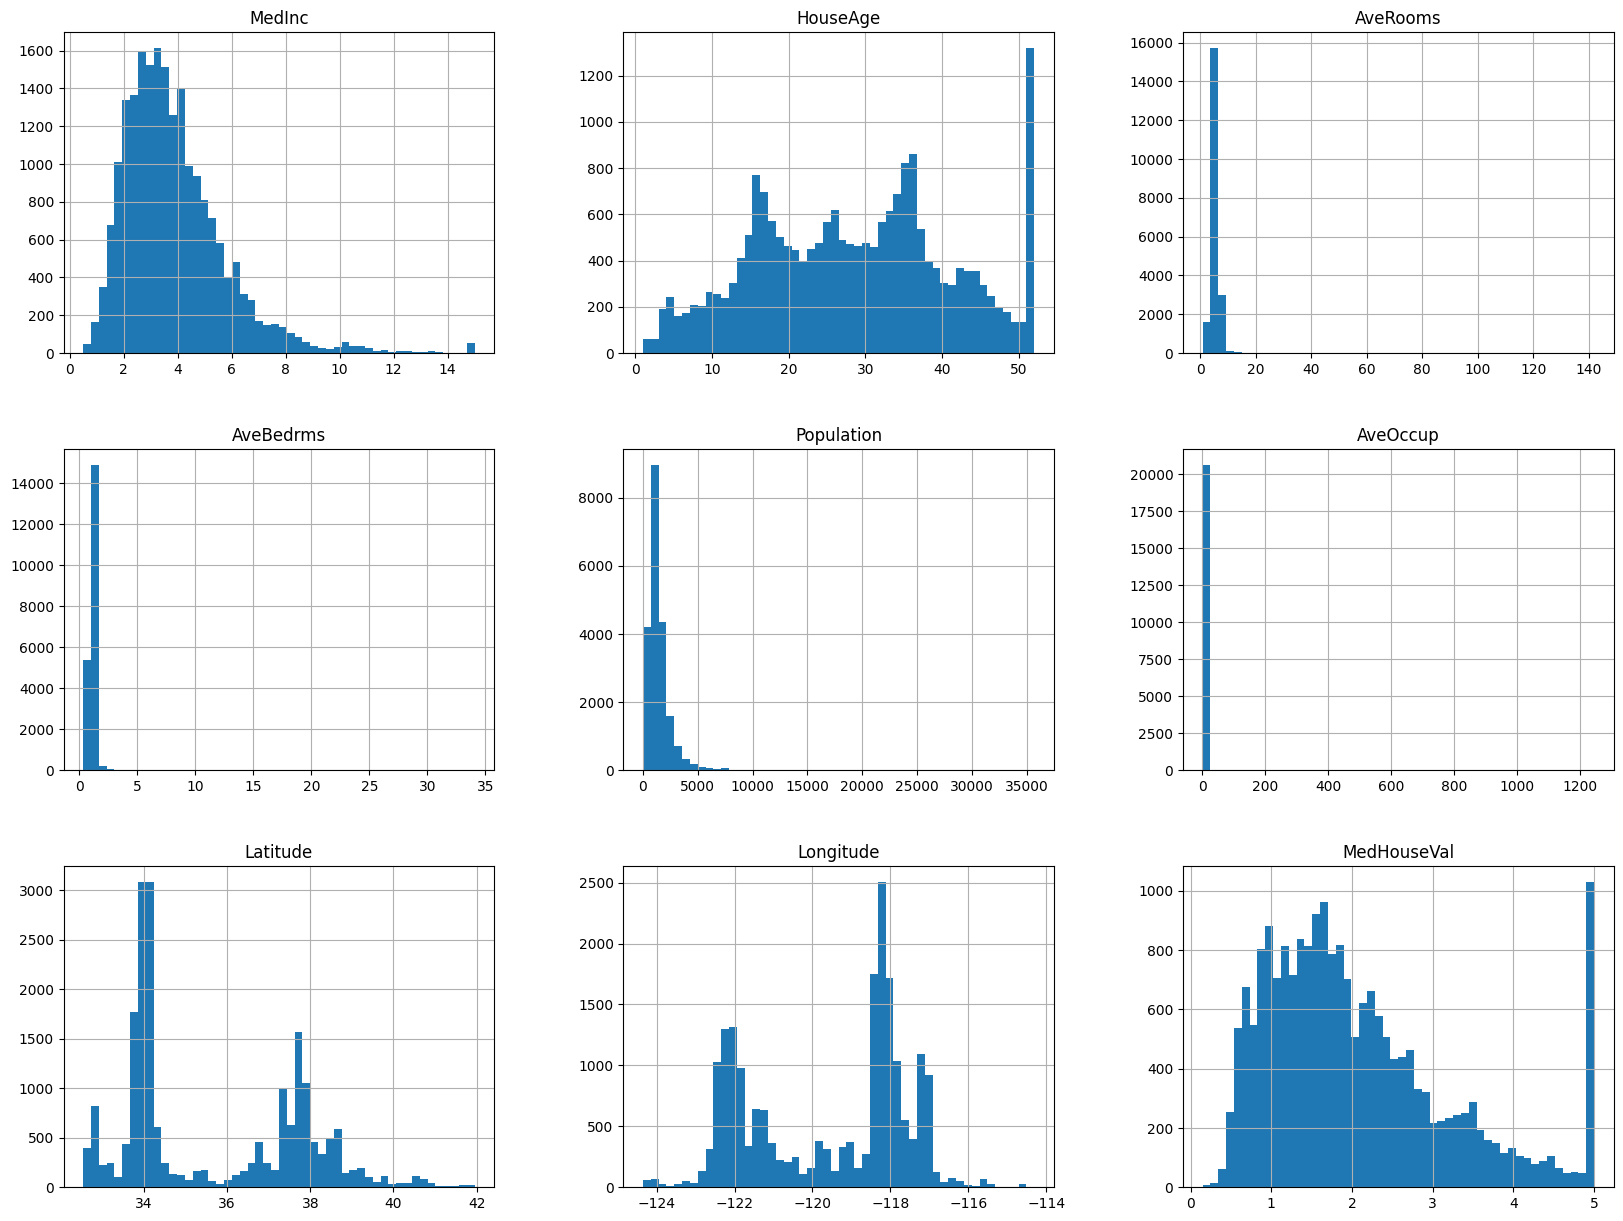

In [16]:
# Visualización de distribuciones
data.hist(bins=50, figsize=(20, 15))
plt.savefig("./img/histograms.png", dpi=300)
plt.show()

In [ ]:
sns.pairplot(data, diag_kind="kde")
plt.savefig("./img/pairplot.png", dpi=300)
plt.show()

In [ ]:
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.savefig("./img/correlation.png", dpi=300)
plt.show()

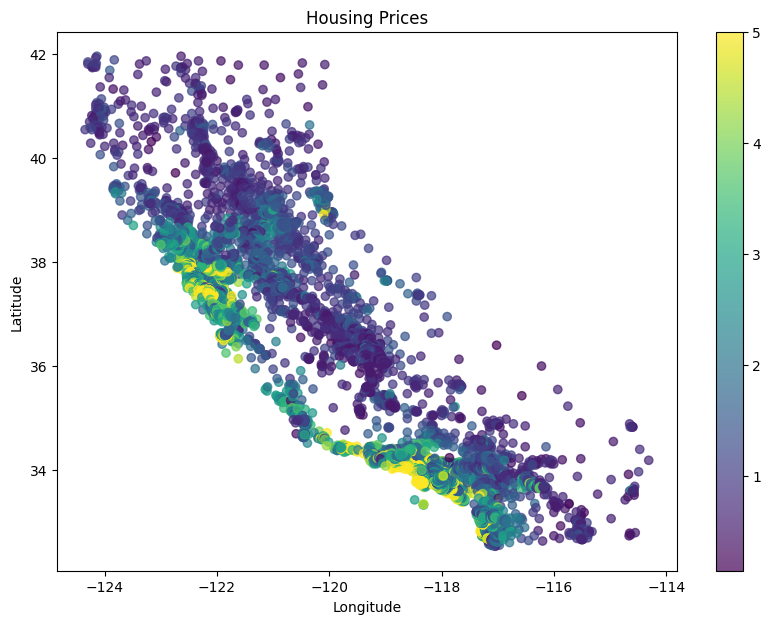

In [18]:
plt.figure(figsize=(10, 7))
plt.scatter(data['Longitude'], data['Latitude'], alpha=0.7, c=data['MedHouseVal'], cmap='viridis')
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Housing Prices')
plt.savefig("./img/housing_prices.png", dpi=300)

# Dataset Treatement

In [ ]:
#Preprocesamiento
X = data.drop('MedHouseVal', axis=1)
y = data['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)
print(f"Tamaño del set de entrenamiento: {len(X_train)}, Tamaño del set de test: {len(X_test)}")

# Escalado de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Training

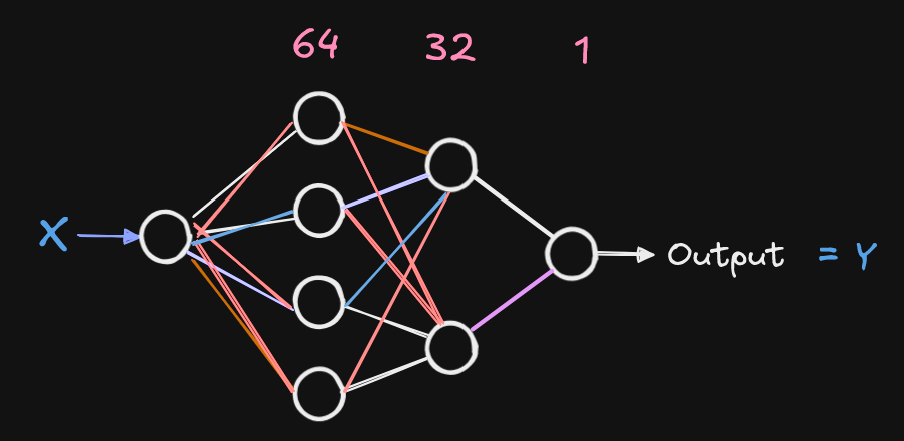

In [19]:
# Crear el modelo
model_1 = Sequential()
model_1.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model_1.add(Dense(32, activation='relu'))
model_1.add(Dense(1))

# Compilar el modelo
model_1.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenar el modelo
history = model_1.fit(X_train_scaled, y_train, epochs=70, batch_size=16, validation_split=0.2)


Epoch 1/70
826/826 [==============================] - 2s 2ms/step - loss: 0.7363 - mae: 0.5930 - val_loss: 0.4184 - val_mae: 0.4593
Epoch 2/70
826/826 [==============================] - 1s 2ms/step - loss: 0.3974 - mae: 0.4447 - val_loss: 0.3918 - val_mae: 0.4374
Epoch 3/70
826/826 [==============================] - 1s 2ms/step - loss: 0.3563 - mae: 0.4232 - val_loss: 0.3758 - val_mae: 0.4240
Epoch 4/70
826/826 [==============================] - 1s 2ms/step - loss: 0.3429 - mae: 0.4117 - val_loss: 0.3490 - val_mae: 0.4076
Epoch 5/70
826/826 [==============================] - 1s 2ms/step - loss: 0.3300 - mae: 0.4015 - val_loss: 0.3471 - val_mae: 0.4094
Epoch 6/70
826/826 [==============================] - 1s 2ms/step - loss: 0.3168 - mae: 0.3918 - val_loss: 0.3431 - val_mae: 0.3941
Epoch 7/70
826/826 [==============================] - 1s 2ms/step - loss: 0.3059 - mae: 0.3841 - val_loss: 0.3444 - val_mae: 0.4237
Epoch 8/70
826/826 [==============================] - 1s 2ms/step - loss: 0.

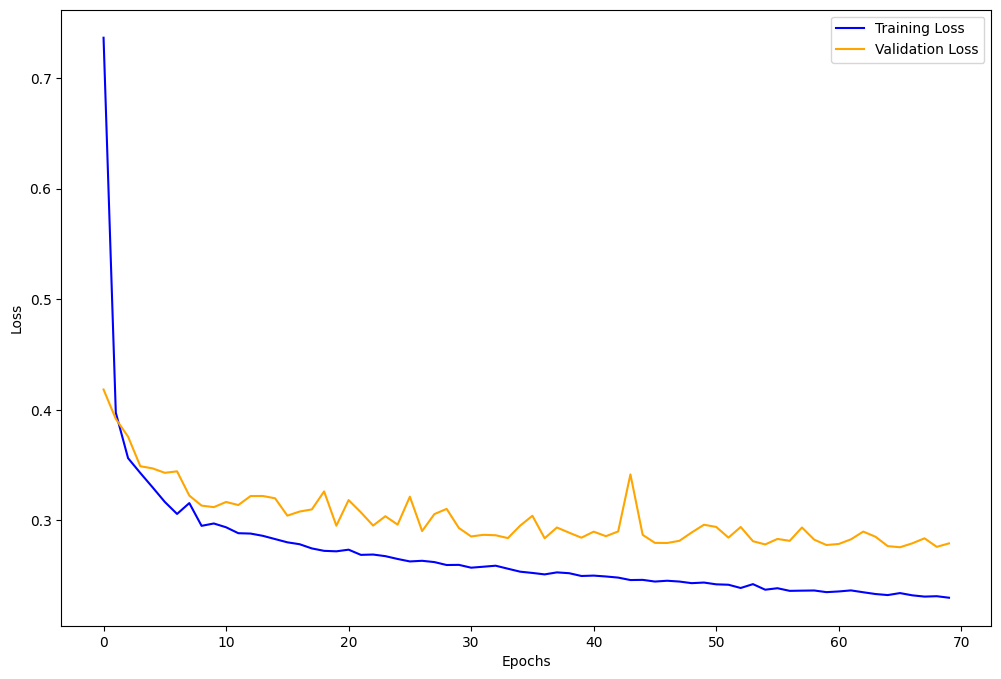

In [20]:
# Historial de entrenamiento
hist = pd.DataFrame(history.history)

# Gráfico de la pérdida
plt.figure(figsize=(12, 8))
plt.plot(hist['loss'], label='Training Loss', color='blue')
plt.plot(hist['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("./img/train_model1.png", dpi=300)
plt.show()

# Evaluation

In [21]:
test_loss, test_mae = model_1.evaluate(X_test_scaled, y_test, verbose=2)
print(f'Test MSE: {test_loss}')
print(f'Test MAE: {test_mae}')


129/129 - 0s - loss: 0.2712 - mae: 0.3472 - 176ms/epoch - 1ms/step
Test MSE: 0.2711966037750244
Test MAE: 0.3472057282924652


129/129 [==============================] - 0s 1ms/step


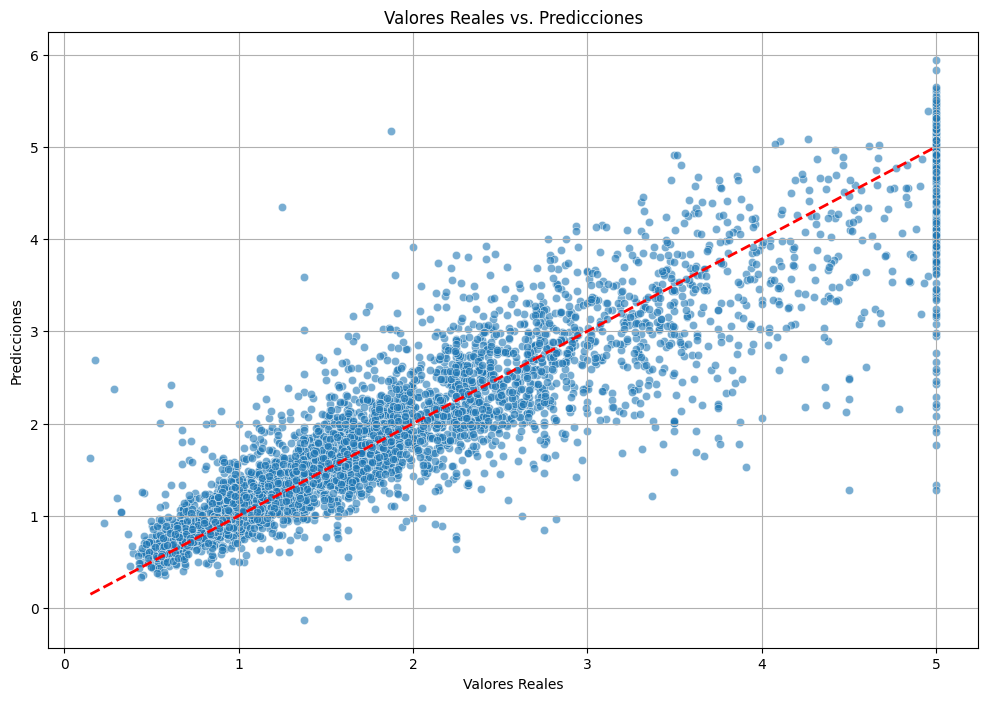

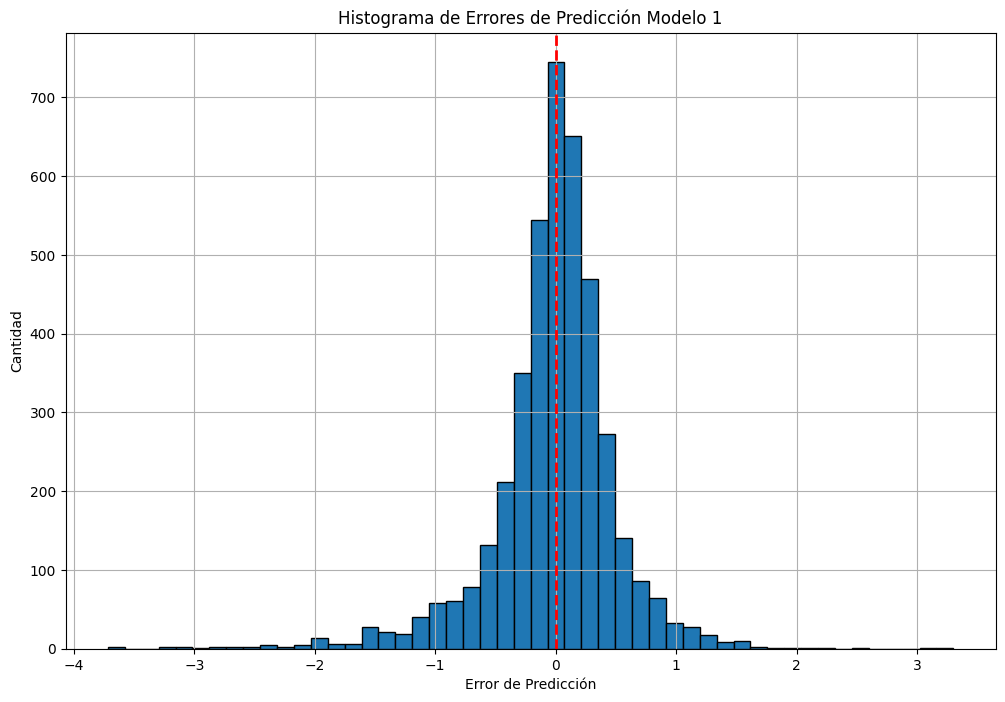

In [22]:
# Predicciones
y_pred = model_1.predict(X_test_scaled)

# Gráfico de valores reales vs. predichos
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='w', linewidth=0.5)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs. Predicciones')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.grid(True)
plt.savefig("./img/scater_model1.png", dpi=300)
plt.show()

y_pred = np.array(y_pred).flatten()
y_test_np = np.array(y_test)
# Error de predicción
errors = y_pred - y_test_np

# Histograma de errores
plt.figure(figsize=(12, 8))
plt.hist(errors, bins=50, edgecolor='black')
plt.axvline(x=0, color='red', linestyle='--', linewidth=2)  # Línea vertical en 0
plt.xlabel('Error de Predicción')
plt.ylabel('Cantidad')
plt.title('Histograma de Errores de Predicción Modelo 1')
plt.grid(True)
plt.savefig("./img/errors_model1.png", dpi=300)
plt.show()

In [23]:
print("Predicción generada por el modelo: ", y_pred[0], " | Valor real:", y_test_np[0])
print("Predicción generada por el modelo: ", y_pred[1], " | Valor real:", y_test_np[1])
print("Predicción generada por el modelo: ", y_pred[2], " | Valor real:", y_test_np[2])

Predicción generada por el modelo:  0.60135573  | Valor real: 0.477
Predicción generada por el modelo:  1.250663  | Valor real: 0.458
Predicción generada por el modelo:  4.8556604  | Valor real: 5.00001


# Training with other configuration

In [ ]:
# Crear el modelo
model_2 = Sequential()
model_2.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model_2.add(Dropout(0.1))
model_2.add(Dense(32, activation='relu'))
model_2.add(Dropout(0.1))
model_2.add(Dense(16, activation='relu'))
model_2.add(Dropout(0.1))
model_2.add(Dense(1))
# Compilar el modelo
model_2.compile(optimizer='nadam', loss='mse', metrics=['mae'])

# Entrenar el modelo
history_2 = model_2.fit(X_train_scaled, y_train, epochs=80, batch_size=8, validation_split=0.2)

In [ ]:
# Historial de entrenamiento
hist_2 = pd.DataFrame(history_2.history)

# Gráfico de la pérdida
plt.figure(figsize=(12, 8))
plt.plot(hist_2['loss'][1:], label='Training Loss')
plt.plot(hist_2['val_loss'][1:], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend("Training history")
plt.savefig("./img/train_model2.png", dpi=300)
plt.show()

In [ ]:
test_loss_2, test_mae_2 = model_2.evaluate(X_test_scaled, y_test, verbose=2)
print(f'Test Loss: {test_loss_2}')
print(f'Test MAE: {test_mae_2}')

# Predicciones
y_pred_2 = model_2.predict(X_test_scaled)

# Gráfico de valores reales vs. predichos
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred_2, alpha=0.6, edgecolors='w', linewidth=0.5)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs. Predicciones')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.grid(True)
plt.savefig("./img/scater_model2.png", dpi=300)
plt.show()

y_pred_2 = np.array(y_pred_2).flatten()
y_test_np = np.array(y_test)
# Error de predicción
errors_2 = y_pred_2 - y_test_np

# Histograma de errores
plt.figure(figsize=(12, 8))
plt.hist(errors_2, bins=50, edgecolor='black')
plt.axvline(x=0, color='red', linestyle='--', linewidth=2)  # Línea vertical en 0
plt.xlabel('Error de Predicción')
plt.ylabel('Cantidad')
plt.title('Histograma de Errores de Predicción Modelo 2')
plt.grid(True)
plt.savefig("./img/errors_model2.png", dpi=300)
plt.show()

# model_1 vs model_2 predictions

In [ ]:
print("Predicción generada por el modelo_1: ", y_pred[0], "Predicción generada por el modelo_2: ", y_pred_2[0], " | Valor real:", y_test_np[0])
print("Predicción generada por el modelo_1: ", y_pred[10], "Predicción generada por el modelo_2: ", y_pred_2[10], " | Valor real:", y_test_np[10])
print("Predicción generada por el modelo_1: ", y_pred[20], "Predicción generada por el modelo_2: ", y_pred_2[20], " | Valor real:", y_test_np[20])